# **Import**

In [ ]:
!pip install ultralytics

!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#**Dataset From Roboflow**

In [ ]:
rf = Roboflow(api_key="lg5WLG6yOfH5NkqD3hlr")
project = rf.workspace("test-0j0bi").project("accident-severity-detection-dataset-srhqy-cdypv")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Severity-Detection-Dataset-1 in yolov8:: 100%|██████████| 2456/2456 [00:00<00:00, 2581.74it/s]


# **Training Model Yolov8m**

In [ ]:
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
model = YOLO("yolov8m.pt")
results = model.train(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", epochs=50, optimizer="Adam", lr0=0.0001, imgsz=640, seed=42)

100%|██████████| 49.7M/49.7M [00:00<00:00, 177MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Accident-Severity-Detection-Dataset-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.0MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-Severity-Detection-Dataset-1/train/labels... 852 images, 2 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 1817.70it/s]

train: New cache created: /content/Accident-Severity-Detection-Dataset-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<00:00, 1248.73it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.82G      1.096      1.947       1.45         10        640: 100%|██████████| 54/54 [00:30<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        186        189      0.348      0.663       0.42      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.87G     0.9692      1.299      1.343          6        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        186        189      0.549      0.519      0.594      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.76G     0.9244      1.184      1.333          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.633       0.62      0.673      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.83G     0.8717      1.067      1.272          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        186        189      0.598      0.579      0.646      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.87G     0.8769      1.013      1.287         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        186        189      0.695      0.599      0.707      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.84G     0.8508      0.945       1.25          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        186        189      0.639       0.66       0.66      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.86G      0.846     0.9192      1.245         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        186        189      0.654      0.714       0.74      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.85G     0.8001     0.8498      1.227         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        186        189      0.674      0.597      0.691      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.86G     0.8049     0.8297      1.203          8        640: 100%|██████████| 54/54 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        186        189      0.608      0.715      0.732      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.85G     0.7651     0.8048      1.213         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        186        189      0.639       0.71      0.738      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.86G     0.7554     0.7556      1.184          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        186        189      0.713      0.674       0.74      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.85G     0.7721     0.7502      1.209          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        186        189      0.737      0.633      0.739       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.87G     0.7355     0.7317      1.168          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        186        189      0.638      0.697      0.709      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.86G     0.7291       0.74      1.173          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        186        189        0.7      0.714      0.765      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.87G     0.7452     0.7302      1.197          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        186        189      0.771      0.643      0.771      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.84G     0.6963     0.6781      1.173          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        186        189      0.658      0.712      0.742      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.88G     0.6946     0.6705      1.165          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        186        189       0.72      0.695      0.742      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.83G     0.6701     0.6044      1.149          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]

                   all        186        189      0.774      0.698      0.799      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.86G      0.676     0.6116      1.145         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        186        189      0.647        0.7      0.736      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.85G     0.6854     0.6433      1.153          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.731      0.685      0.751      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.88G      0.676     0.5864      1.153         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        186        189      0.703      0.683      0.742      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.85G     0.6768     0.5964      1.155          6        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

                   all        186        189      0.682      0.779      0.782      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.86G     0.6296     0.5873      1.104          9        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        186        189      0.662      0.743      0.777      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.85G     0.6446     0.5695      1.122         10        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.83it/s]

                   all        186        189      0.718      0.671      0.735      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.86G     0.6136     0.5349      1.089          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all        186        189      0.675      0.698      0.759      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.84G     0.6168     0.5427      1.111          6        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        186        189      0.812      0.632       0.79       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.87G     0.6452     0.5434      1.129          8        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.731       0.71      0.796      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.85G     0.5884     0.5225      1.089          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        186        189      0.754      0.714      0.804       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.87G     0.6024     0.5276      1.091          8        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.787      0.717       0.81      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.86G     0.5961     0.4941      1.087          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.814      0.693      0.798      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.87G     0.5676     0.4716      1.074          9        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189      0.731      0.654      0.767      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.84G     0.5668     0.4583       1.06         11        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all        186        189      0.762      0.653      0.766      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.87G     0.5779     0.4579      1.073          6        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        186        189      0.625      0.747      0.741      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.85G     0.5592     0.4551      1.066          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        186        189      0.738      0.728       0.78      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.86G     0.5796     0.4603      1.086          7        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        186        189      0.795      0.666      0.776      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.83G     0.5752     0.4816      1.085          3        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        186        189      0.641      0.793      0.754      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.87G     0.5589     0.4715       1.08          7        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]

                   all        186        189       0.67      0.711      0.748      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.85G     0.5426     0.4339      1.058          9        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189       0.76      0.704      0.783      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.88G      0.543     0.4399      1.075          5        640: 100%|██████████| 54/54 [00:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        186        189      0.697      0.757      0.796      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.84G     0.5435     0.4137       1.07         11        640: 100%|██████████| 54/54 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        186        189      0.667      0.743      0.772      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.87G      0.365     0.2596      0.926          4        640: 100%|██████████| 54/54 [00:29<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        186        189      0.754      0.672      0.783      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.85G     0.3591     0.2325     0.9158          4        640: 100%|██████████| 54/54 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        186        189      0.684      0.709      0.761      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.87G     0.3548     0.2181     0.9013          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.82it/s]

                   all        186        189        0.7      0.745      0.772      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.83G     0.3406     0.2188     0.8989          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        186        189      0.762      0.739      0.796      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.86G     0.3287     0.2091     0.8886          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.751      0.701      0.779      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.85G     0.3168     0.2121     0.8818          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        186        189      0.666       0.74      0.774       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.87G     0.3261     0.2078     0.8843          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all        186        189      0.689       0.75      0.778      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.85G     0.3131     0.1999     0.8852          5        640: 100%|██████████| 54/54 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all        186        189      0.709      0.717      0.779      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.86G     0.3078     0.1938     0.8856          4        640: 100%|██████████| 54/54 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        186        189      0.699      0.736      0.793      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.84G     0.3095     0.1937     0.8823          4        640: 100%|██████████| 54/54 [00:29<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        186        189      0.739        0.7      0.788      0.623



50 epochs completed in 0.463 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]


                   all        186        189      0.762      0.741      0.795       0.64
              moderate         66         66      0.712      0.675      0.729      0.574
                severe        120        123      0.812      0.807      0.861      0.707
Speed: 0.3ms preprocess, 9.9ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


# **conf=0.25**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.25)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]


                   all        186        189      0.761      0.739      0.785      0.649
              moderate         66         66      0.711      0.671      0.723       0.58
                severe        120        123      0.812      0.807      0.847      0.719
Speed: 0.3ms preprocess, 21.9ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc398293100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.25, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<00:00, 539.85it/s]

val: New cache created: /content/Accident-Severity-Detection-Dataset-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]


                   all        184        191      0.801      0.669      0.771      0.632
              moderate         84         84      0.812      0.515      0.674      0.553
                severe        100        107      0.789      0.822      0.869      0.711
Speed: 0.4ms preprocess, 21.9ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc2b8c0a110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.25, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 37.1ms
Speed: 3.5ms preprocess, 37.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

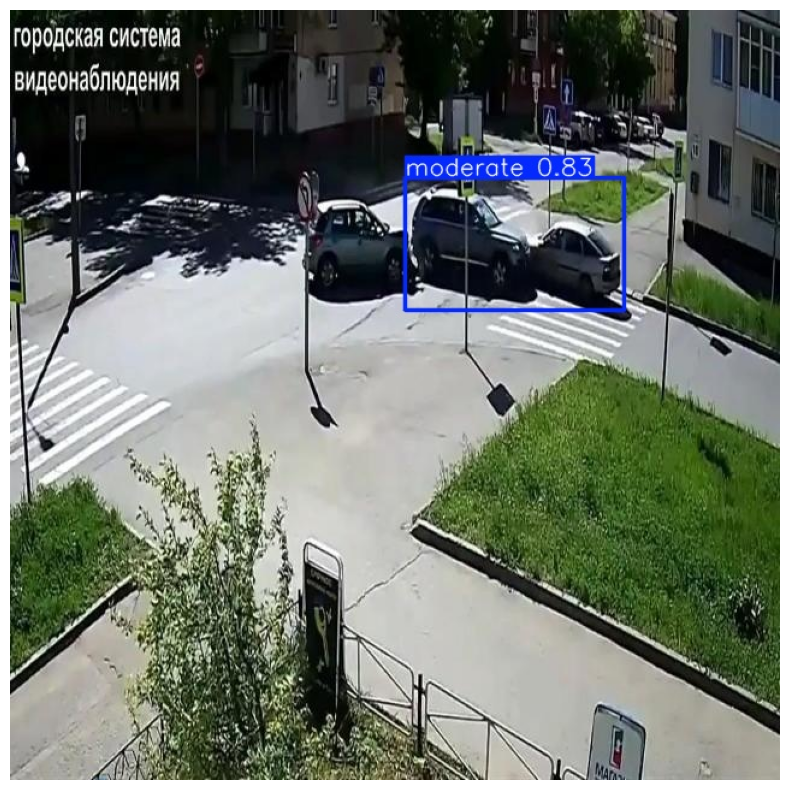

In [ ]:
image_path = "/content/runs/detect/predict/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

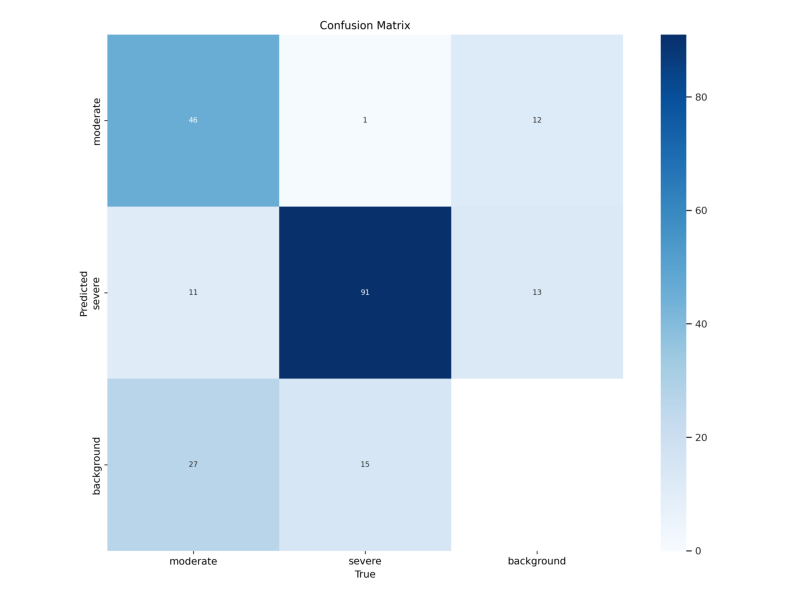

In [ ]:
image_path = '/content/runs/detect/val2/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# **conf=0.5**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.5)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]


                   all        186        189      0.778      0.732      0.783      0.653
              moderate         66         66      0.733      0.667      0.725      0.591
                severe        120        123      0.824      0.797      0.841      0.715
Speed: 0.5ms preprocess, 21.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc2c2322530>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.5, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]


                   all        184        191      0.823      0.627      0.763      0.635
              moderate         84         84      0.841       0.44       0.66      0.557
                severe        100        107      0.806      0.813      0.867      0.714
Speed: 0.4ms preprocess, 22.1ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc2b8b9c310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.5, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 37.1ms
Speed: 2.7ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

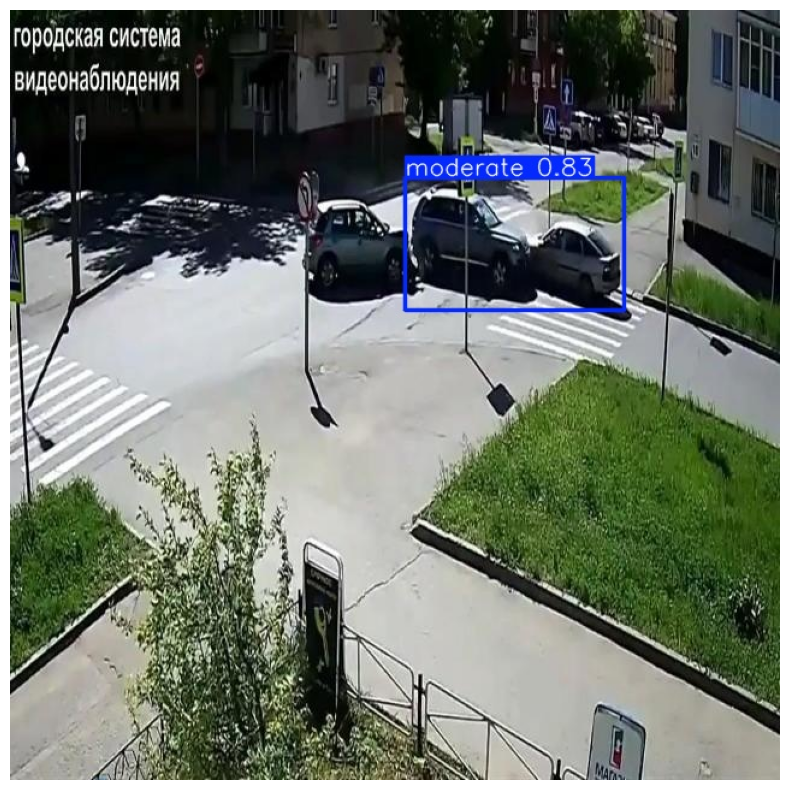

In [ ]:
image_path = "/content/runs/detect/predict2/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

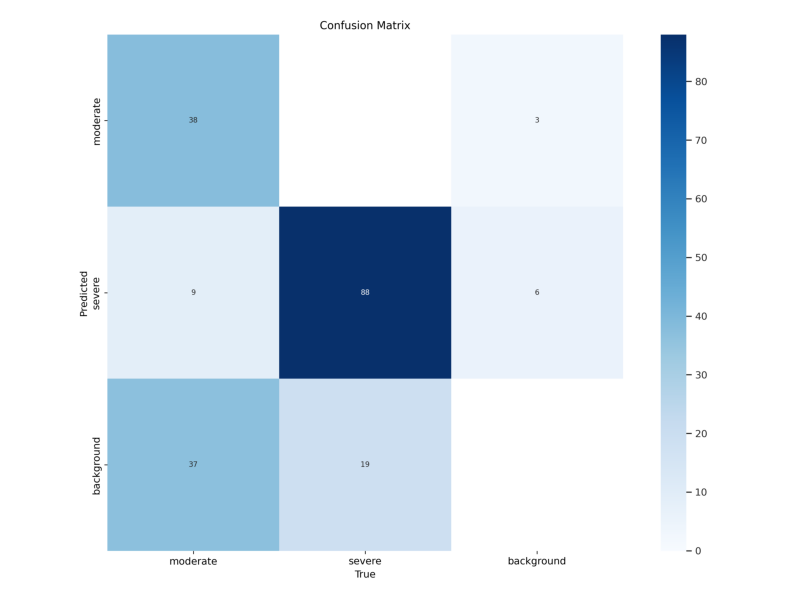

In [ ]:
image_path = '/content/runs/detect/val4/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# **conf=0.75**

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val(imgsz=640, conf=0.75)

print(metrics)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Accident-Severity-Detection-Dataset-1/valid/labels.cache... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]


                   all        186        189      0.868      0.607      0.748      0.643
              moderate         66         66       0.85      0.515      0.689      0.589
                severe        120        123      0.887      0.699      0.807      0.697
Speed: 0.5ms preprocess, 22.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc314217370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     

In [ ]:
model.val(data="/content/Accident-Severity-Detection-Dataset-1/data.yaml", split='test',  conf=0.75, imgsz=640)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Accident-Severity-Detection-Dataset-1/test/labels.cache... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]


                   all        184        191      0.908      0.568      0.754       0.64
              moderate         84         84      0.921      0.417      0.673      0.574
                severe        100        107      0.895       0.72      0.835      0.707
Speed: 0.5ms preprocess, 22.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc2b85eedd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.predict(source="/content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg", save=True, conf=0.75, imgsz=640)


image 1/1 /content/Accident-Severity-Detection-Dataset-1/test/images/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg: 640x640 1 moderate, 37.1ms
Speed: 3.4ms preprocess, 37.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'moderate', 1: 'severe'}
 obb: None
 orig_img: array([[[  0,  19,   0],
         [  1,  23,   4],
         [  5,  27,   9],
         ...,
         [ 81,  75,  62],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  2,  24,   5],
         [  4,  26,   7],
         [  6,  28,  10],
         ...,
         [ 80,  74,  61],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        [[  5,  27,   9],
         [  3,  25,   7],
         [  5,  24,   7],
         ...,
         [ 80,  74,  63],
         [ 59,  53,  40],
         [ 93,  87,  74]],
 
        ...,
 
        [[139, 144, 145],
         [158, 163, 164],
         [176, 181, 182],
         ...,
         [152, 165, 167],
         [153, 166, 168],
         [153, 166, 168]],
 
        [[161, 166, 167],
         [170, 175, 176],
         [179, 184, 185],
         ...,
   

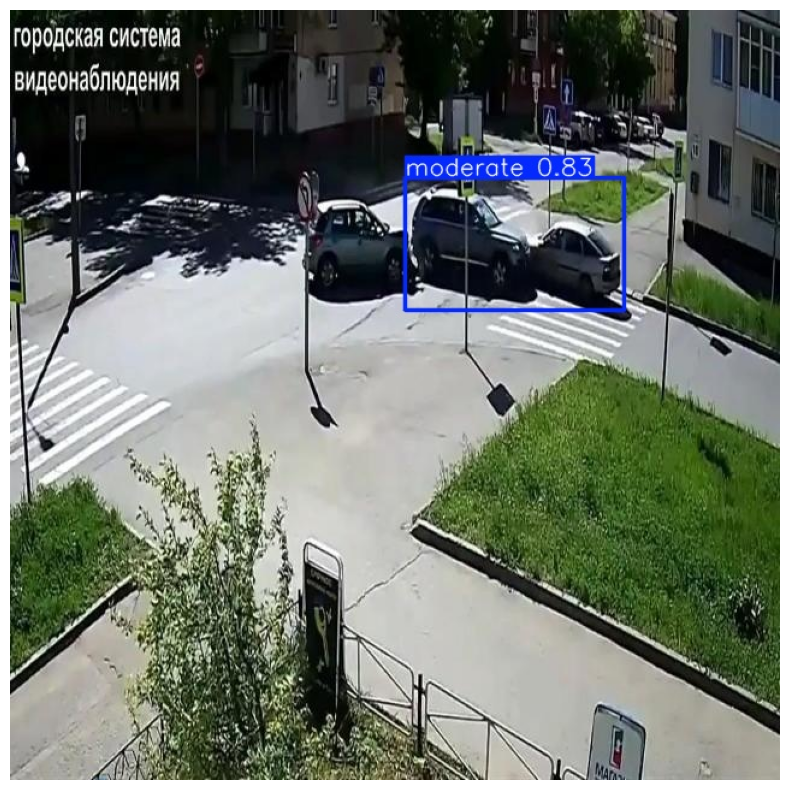

In [ ]:
image_path = "/content/runs/detect/predict3/1107_jpeg_jpg.rf.4716a47436bf734a0eedd7f4c498b589.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

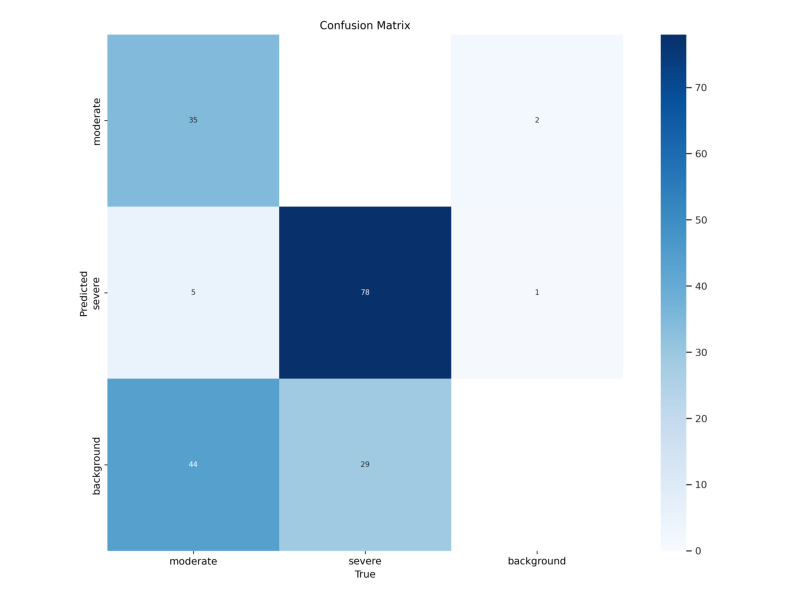

In [ ]:
image_path = '/content/runs/detect/val6/confusion_matrix.png'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()